<h2><center> <font color='black'>  Fairness and Explainability</font></center></h3>


# Introduction:

* Machine learning models are still black box capable of performing magic to give people what they want. However, the harsh reality is that without a `reasonable understanding of how machine learning models or the data science pipeline works, real-world projects rarely succeed.`


* Considering any data science project in the real world, you will typically have a `business aspect` and the `technical or solution aspect.`

* Now, data scientists typically work to build models and provide solutions for the business. However, the business may not know the details of how a model might work. But since this very model will be making a lot of decisions for them in the end, they do have a right to pose the question, **How can I trust your model?** or **How does your model really make its decisions?** Answering these questions is something data science practitioners and researchers have been trying over several years now.


## Understanding Machine Learning Model Interpretation

* Machine Learning has seen widespread industry adoption only in the last couple of years. Hence, `model interpretation` as a concept is still mostly theoretical and subjective.

* Any machine learning model at its heart has a `target function` which tries to map and explain relationships and patterns between the `independent (input) variables and the dependent (target or response) variable(s).`

* When a model predicts or finds our insights, it takes certain decisions and choices. **Model interpretation** tries to understand and explain these decisions taken by the response function i.e., `the what, why and how.` 

* The key to model interpretation is transparency, the ability to question, and the ease of understanding model decisions by humans. The three most important aspects of model interpretation are explained as follows.

    * `What drives model predictions?` We should have the ability to query our model and find out latent feature interactions to get an idea of `which features might be important` in the decision-making policies of the model. This ensures **fairness** of the model.
    
    * `Why did the model take a certain decision?` We should also be able to validate and justify why certain key features were responsible in driving certain decisions taken by a model during predictions. This ensures **accountability and reliability** of the model.
    
    * `How can we trust model predictions?` We should be able to evaluate and validate any data point and how a model takes decisions on it. This should be demonstrable and easy to understand for key stakeholders that the model works as expected. This ensures **transparency** of the model.
    
    
* **Interpretability** also popularly known as `human-interpretable interpretations (HII)` of a machine learning model is the extent to which a human (including non-experts in machine learning) can understand the choices taken by models in their decision-making process `(the how, why and what).`


* Some of us might argue if a model is working great why bother digging deeper? Always remember that when solving data science problems in the real-world, for `the business to trust your model predictions and decisions, they will keep asking the question,` **Why should I trust your model?** and this makes perfect sense.


* Would you be satisfied with a model just predicting and taking decisions **(the what)** like if a person has cancer or diabetes, if a person might be a risk to society or even if a customer will churn? Maybe not, we might prefer it more if we could know more about the model’s decision process **(the why and how).** This gives us more transparency into why the model makes certain decisions, what might go wrong in certain scenarios and over time it helps us build a certain amount of trust on these machine learning models.


* **Model Interpretation** is something which can make or break a real-world machine learning project in the industry and helps us come one step closer to `explainable artificial intelligence (XAI).`



## Traditional Techniques for Model Interpretation

* Model interpretation at heart, is to find out ways to understand model decision making policies better. This is to enable `fairness, accountability and transparency` which will give humans enough confidence to use these models in real-world problems which a lot of impact to business and society. 


* Hence, there are techniques which have existed for a long time now, which can be used to understand and interpret models in a better way. These can be grouped under the following two major categories.
     * `Exploratory analysis and visualization techniques` like clustering and dimensionality reduction.
     * `Model performance evaluation metrics` like accuracy and the AUC (for classification models) and root mean-square error, mean absolute error (for regression models)
     
  
## Limitations of Traditional Techniques and Motivation for Better Model Interpretation

* The techniques we discussed in the previous techniques are definitely helpful in trying to understand more about our data, features as well as which models might be effective. However, they are quite limiting in terms of trying to discern human-interpretable ways of how a model works.


## Model Interpretation Techniques

* There are a wide variety of new model interpretation techniques which try to address the limitations and challenges of traditional model interpretation techniques and try to combat the classic Intepretability vs. Model Performance Trade-off.
    * **Using Interpretable Models:** The easiest way to get started with model interpretation is to use models which are interpretable out of the box! This typically includes your regular parametric models like `linear regression, logistic regression, tree-based models`
    * **Feature Importance:** is generic term for the degree to which a predictive model relies on a particular feature. Typically, a feature’s importance is the increase in the model’s prediction error after we permuted the feature’s values like `Skater`, and `Shap` methods `(will be discussed in this lab session)`
    * **Partial Dependence Plots:** Partial Dependence describes the marginal impact of a feature on model prediction, holding other features in the model constant. The partial dependence plot `(PDP or PD plot)` shows the marginal effect of a feature on the predicted outcome of a previously fit model. PDPs can show if the relationship between the target and a feature is linear, monotonic or more complex. `(will be discussed in this lab session)` using `Skater and SHAP`
    * **Global Surrogate Models:** A global surrogate model is an interpretable model that is trained to approximate the predictions of a black box model which can essentially be any model regardless of its complexity or training algorithm. `Skater`
    * **Local Interpretable Model-agnostic Explanations (LIME):** LIME is a novel algorithm designed by Riberio Marco, Singh Sameer, Guestrin Carlos to access the behavior of the any base estimator(model) using local interpretable surrogate models (e.g. linear classifier/regressor). Basically, LIME explanations are based on local surrogate models. These, surrogate models are interpretable models (like a linear model or decision tree) that are learned on the predictions of the original black box model. But instead of trying to fit a global surrogate model, LIME focuses on fitting local surrogate models to explain why single predictions were made. `LIME`.
    * **Shapley Values and SHapley Additive exPlanations (SHAP):** is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations, uniting several previous methods and representing the only possible consistent and locally accurate additive feature attribution method based on what they claim! (do check out the SHAP NIPS paper for details). 
    


    




# Load necessary dependencies

In [1]:
!pip install eli5
!pip install shap

In [2]:
import pandas as pd
import numpy as np

# upload the "model_evaluation_utils.py" file to your notebook before running this cell, you can find it in Moodle.
import model_evaluation_utils as meu

import matplotlib.pyplot as plt
from collections import Counter
import shap
import eli5

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

shap.initjs()

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.


# Load the Census Income Dataset

In [4]:
train =  pd.read_csv('train.csv')
test = pd.read_csv('test.csv', )
df = pd.concat([train,test])


In [5]:
# map label to 1(signed), and 0(not signed)
df['label'] = df['label'].map({'regular': 0, 'deviant': 1})

In [6]:
labels = df['label']
del df['label']
# del df['Treatment']
data = df
# #data

In [7]:
#data, labels = shap.datasets.adult(display=True)
print(labels)
labels = np.array([int(label) for label in labels])
data.shape, labels.shape

0         0
1         0
2         0
3         0
4         0
         ..
128193    1
128194    1
128195    0
128196    0
128197    0
Name: label, Length: 520864, dtype: int64


((520864, 28), (520864,))

In [11]:
del data['Case ID']
del data['EventID']

# Basic Feature Engineering

* Here we convert the categorical columns with string values to numeric representations. 


* Typically the XGBoost model can handle categorical data natively being a tree-based model so we don't one-hot encode the features

In [12]:
cat_cols = data.select_dtypes(['object']).columns
for col in cat_cols:
    data[col] = data[col].astype('category')
#cat_cols

In [13]:
cat_cols = data.select_dtypes(['category']).columns
data[cat_cols] = data[cat_cols].apply(lambda x: x.cat.codes)
data.head()

NumberOfOffers  Activity  LoanGoal  ...  timesincecasestart  event_nr  wip
0               1         4         5  ...                0.00       1.0    1
1               1         8         5  ...                0.00       2.0    1
2               1        22         5  ...                0.00       3.0    1
3               1         3         5  ...                1.35       6.0    1
4               1        21         5  ...                1.35       5.0    1

[5 rows x 26 columns]

## Viewing distribution of people with <=  \$50K (False) and > \$50K (True) income

In [14]:
Counter(labels)

Counter({0: 317648, 1: 203216})

# Building Train and Test Datasets

* For any machine learning model, we always need train and test datasets. We will be building the model on the train dataset and test the performance on the test dataset. 

* We maintain two datasets `(one with the encoded categorical values and one with the original values)` so we can train with the encoded dataset but use the original dataset as needed later on for model interpretation. 

In [15]:
# encoded data set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((364604, 26), (156260, 26))

In [16]:
X_train.head(3)

NumberOfOffers  Activity  LoanGoal  ...  timesincecasestart  event_nr    wip
299183               2        24         7  ...        44360.616667      23.0  11005
39066                1        20         5  ...        38922.516667      36.0  10346
237270               1        20         2  ...        57250.933333      35.0  10004

[3 rows x 26 columns]

In [17]:
# Original data set
data_disp, labels_disp = data, labels
X_train_disp, X_test_disp, y_train_disp, y_test_disp = train_test_split(data_disp, labels_disp, test_size=0.3, random_state=42)
X_train_disp.shape, X_test_disp.shape

((364604, 26), (156260, 26))

In [18]:
X_train_disp.head(3)

NumberOfOffers  Activity  LoanGoal  ...  timesincecasestart  event_nr    wip
299183               2        24         7  ...        44360.616667      23.0  11005
39066                1        20         5  ...        38922.516667      36.0  10346
237270               1        20         2  ...        57250.933333      35.0  10004

[3 rows x 26 columns]

# Training the classification model

We will now train and build a basic boosting classification model on our training data using the popular [XGBoost](https://xgboost.readthedocs.io/en/latest/) 
framework, an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable 

In [19]:
%%time

import xgboost as xgb

xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc.fit(X_train, y_train)

CPU times: user 5min, sys: 1 s, total: 5min 1s
Wall time: 5min


# Making predictions on the test data

Here we do the usual, use the trained model to make predictions on the test dataset

In [20]:
predictions = xgc.predict(X_test)
predictions[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

# Model Performance Evaluation

Time to put the model to the test! Let's evaluate how our model has performed with its predictions on the test data. 
We use my nifty `model_evaluation_utils` module for this which leverages `scikit-learn` internally to give us 
standard classification model evaluation metrics

In [21]:
class_labels = list(set(labels))
meu.display_model_performance_metrics(true_labels=y_test, predicted_labels=predictions, classes=class_labels)

Model Performance metrics:
------------------------------
Accuracy: 0.8697
Precision: 0.8691
Recall: 0.8697
F1 Score: 0.8692

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     95443
           1       0.85      0.81      0.83     60817

    accuracy                           0.87    156260
   macro avg       0.87      0.86      0.86    156260
weighted avg       0.87      0.87      0.87    156260



# Default Model Interpretation Methods

By default it is difficult to gauge on specific model interpretation methods for machine learning models out of the box. 
`Parametric models` like logistic regression are easier to interpret given that the total number of parameters of the model
are fixed regardless of the volume of data and one can make some interpretation of the model's prediction decisions leveraging
the parameter coefficients.

`Non-parametric models` are harder to interpret given that the total number of parameters remain unbounded and increase
with the increase in the data volume. Some non-parametric models like tree-based models do have some out of the box model 
interpretation methods like feature importance which helps us in understanding which features might be influential in
the model making its prediction decisions

## Classic feature importances from XGBoost

Here we try out the global feature importance calcuations that come with XGBoost. The model enables us to view feature importances based on the following.

- __Feature Weights:__ This is based on the number of times a feature appears in a tree across the ensemble of trees
- __Gain:__ This is based on the average gain of splits which use the feature
- __Coverage:__ This is based on the average coverage (number of samples affected) of splits which use the feature

Note that they all contradict each other, which motivates the use of model interpretation frameworks like SHAP which uses something known as SHAP values, which claim to come with consistency guarantees (meaning they will typically order the features correctly).

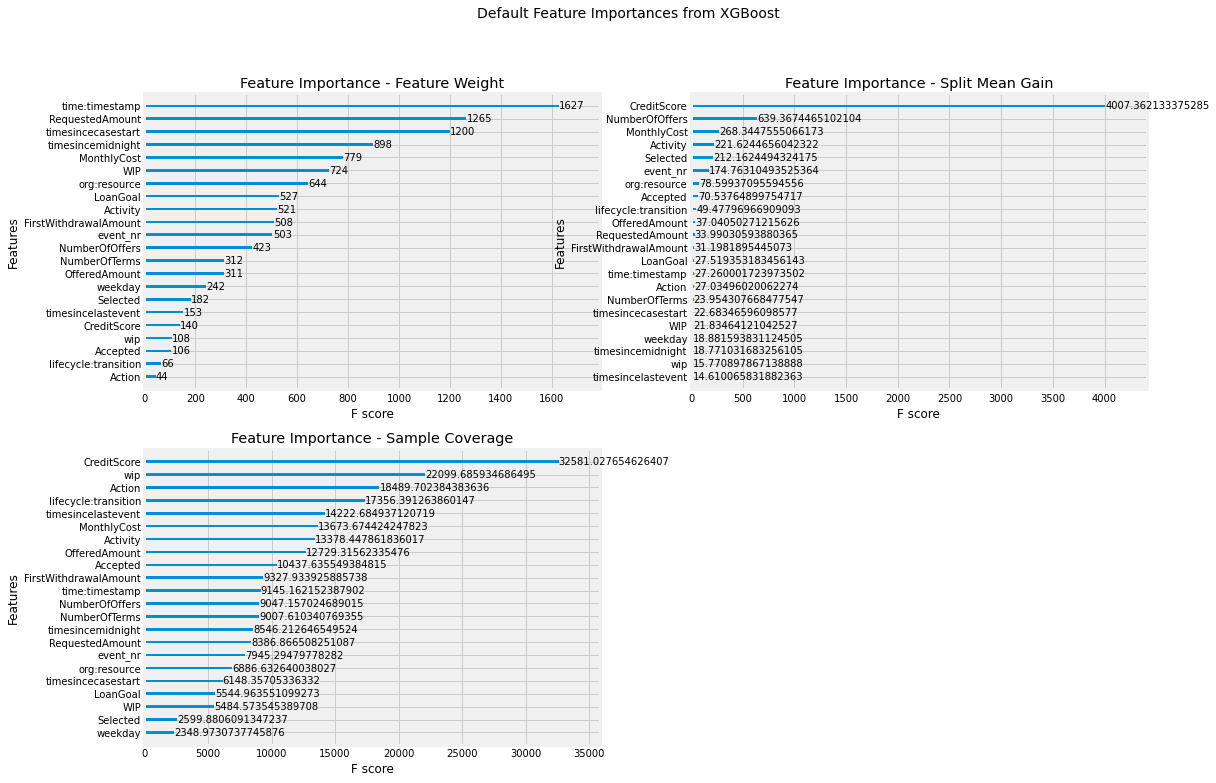

In [22]:
fig = plt.figure(figsize = (16, 12))
title = fig.suptitle("Default Feature Importances from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2,2, 1)
xgb.plot_importance(xgc, importance_type='weight', ax=ax1)
t=ax1.set_title("Feature Importance - Feature Weight")

ax2 = fig.add_subplot(2,2, 2)
xgb.plot_importance(xgc, importance_type='gain', ax=ax2)
t=ax2.set_title("Feature Importance - Split Mean Gain")

ax3 = fig.add_subplot(2,2, 3)
xgb.plot_importance(xgc, importance_type='cover', ax=ax3)
t=ax3.set_title("Feature Importance - Sample Coverage")

# Model Interpretation with ELI5

[__ELI5__](https://github.com/TeamHG-Memex/eli5) is a Python package which helps to debug machine learning classifiers and explain their predictions in an easy to understand an intuitive way. It is perhaps the easiest of the three machine learning frameworks to get started with since it involves minimal reading of documentation! However it doesn't support true model-agnostic interpretations and support for models are mostly limited to tree-based and other parametric\linear models. Let's look at some intuitive ways of model interpretation with ELI5 on our classification model. 

### Installation Instructions

We recommend installing this framework using __`pip install eli5`__ since the `conda` version appears to be a bit out-dated. Also feel free to check out [__the documentation__](https://eli5.readthedocs.io/en/latest/overview.html) as needed.

## Feature Importances with ELI5

Typically for tree-based models ELI5 does nothing special but uses the out-of-the-box feature importance computation methods which we discussed in the previous section. By default, __'gain'__ is used, that is the average gain of the feature when it is used in trees.

In [23]:
eli5.show_weights(xgc.get_booster())

## Explaining Model Prediction Decisions with ELI5

One of the best way to explain model prediction decisions to either a technical or a more business-oriented individual, is to  `examine individual data-point predictions.` Typically, ELI5 does this by showing weights for each feature depicting how influential it might have been in contributing to the final prediction decision across all trees. The idea for weight calculation is described in http://blog.datadive.net/interpreting-random-forests/; ELI5 provides an independent implementation of this algorithm for XGBoost and most scikit-learn tree ensembles which is definitely on the path towards model-agnostic interpretation but not purely model-agnostic like LIME.

Typically, the prediction can be defined as the sum of the feature contributions + the “bias” (i.e. the mean given by the topmost region that covers the entire training set)

In [24]:
doc_num = 0
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', predictions[doc_num])
eli5.show_prediction(xgc.get_booster(), X_test.iloc[doc_num], 
                     feature_names=list(data.columns) ,show_feature_values=True)

Actual Label: 0
Predicted Label: 0


In [25]:
doc_num = 2
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', predictions[doc_num])
eli5.show_prediction(xgc.get_booster(), X_test.iloc[doc_num], feature_names=list(data.columns) ,show_feature_values=True)

Actual Label: 0
Predicted Label: 0


# Global Interpretations with Skater

A predictive model is a mapping from an input space to an output space. Interpretation algorithms are divided into those that offer statistics and metrics on regions of the domain, such as the marginal distribution of a feature, or the joint distribution of the entire training set. In an ideal world there would exist some representation that would allow a human to interpret a decision function in any number of dimensions. Given that we generally can only intuit visualizations of a few dimensions at time, global interpretation algorithms either aggregate or subset the feature space.

Currently, model-agnostic global interpretation algorithms supported by skater include partial dependence and feature importance with a very new release of tree-surrogates also. We will be covering feature importance and partial dependence plots here

## Creating an interpretation object
The general workflow within the skater package is to create an interpretation, create a model, and run interpretation algorithms. Typically, an `Interpretation` consumes a dataset, and optionally some metadata like feature names and row ids. Internally, the `Interpretation` will generate a `DataManager` to handle data requests and sampling.

- __Local Models(`InMemoryModel`):__ To create a skater model based on a local function or method, pass in the predict function to an `InMemoryModel`. A user can optionally pass data samples to the examples keyword argument. This is only used to infer output types and formats. Out of the box, skater allows models return `numpy` arrays and `pandas` dataframes.

- __Operationalized Model(`DeployedModel`):__ If your model is accessible through an API, use a `DeployedModel`, which wraps the requests library. `DeployedModels` require two functions, an input formatter and an output formatter, which speak to the requests library for posting and parsing. The input formatter takes a `pandas` DataFrame or a `numpy` ndarray, and returns an object (such as a dict) that can be converted to JSON to be posted. The output formatter takes a requests.response as an input and returns a `numpy` ndarray or `pandas` DataFrame.

We will use the following workflow:

- Build an interpretation object
- Build an in-memory model
- Perform interpretations

# Local Interpretations with Skater

Local Interpretation could be possibly be achieved in two ways. Firstly, one could possibly approximate the behavior of a complex predictive model in the vicinity of a single input using a simple interpretable auxiliary or surrogate model (e.g. Linear Regressor). Secondly, one could use the base estimator to understand the behavior of a single prediction using intuitive approximate functions based on inputs and outputs.

## Local Interpretable Model-Agnostic Explanations(LIME)
* **LIME** is a novel algorithm designed by Riberio Marco, Singh Sameer, Guestrin Carlos to `access the behavior of the any base estimator(model) using interpretable surrogate models (e.g. linear classifier/regressor)`. Such form of comprehensive evaluation helps in generating explanations which are locally faithful but may not align with the global behavior. Basically, `LIME explanations are based on local surrogate models.` These, surrogate models are interpretable models (like a linear model or decision tree) that are learned on the predictions of the original black box model. But instead of trying to fit a global surrogate model, LIME focuses on fitting local surrogate models to explain why single predictions were made.

The idea is very intuitive. To start with, just try and unlearn what you have done so far! Forget about the training data, forget about how your model works! Think that your model is a black box model with some magic happening inside, where you can input data points and get the models predicted outcomes. You can probe this magic black box as often as you want with inputs and get output predictions.

Now, you main objective is to understand why the machine learning model which you are treating as a magic black box, gave the outcome it produced. `LIME tries to do this for you! It tests out what happens to you black box model's predictions when you feed variations or perturbations of your dataset into the black box model.` Typically, LIME generates a new dataset consisting of perturbed samples and the associated black box model's predictions. On this dataset LIME then trains an interpretable model weighted by the proximity of the sampled instances to the instance of interest. 

* Following is a standard high-level workflow for this.
 - Choose your instance of interest for which you want to have an explanation of the predictions of your black box model.
 - Perturb your dataset and get the black box predictions for these new points.
 - Weight the new samples by their proximity to the instance of interest.
 - Fit a weighted, interpretable (surrogate) model on the dataset with the variations.
 - Explain prediction by interpreting the local model.
 
We recommend you to read the [LIME chapter](https://christophm.github.io/interpretable-ml-book/lime.html) in Christoph Molnar's excellent book on Model Interpretation which talks about this in detail.

## Explaining Model Predictions with Skater using LIME

Skater can leverage LIME to explain model predictions. Typically, its __`LimeTabularExplainer`__ class helps in explaining predictions on tabular (i.e. matrix) data. For numerical features, it perturbs them by sampling from a Normal(0,1) and doing the inverse operation of mean-centering and scaling, according to the means and stds in the training data. For categorical features, it perturbs by sampling according to the training distribution, and making a binary feature that is 1 when the value is the same as the instance being explained. The __`explain_instance()`__ function generates explanations for a prediction. First, we generate neighborhood data by randomly perturbing features from the instance. We then learn locally weighted linear (surrogate) models on this neighborhood data to explain each of the classes in an interpretable way.

Since XGBoost has some issues with feature name ordering when building models with dataframes, we will build our same model with numpy arrays to make LIME work without additional hassles of feature re-ordering. Remember the model being built is the same ensemble model which we treat as our black box machine learning model

In [26]:
xgc_np = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,
                        objective='binary:logistic', random_state=42)
xgc_np.fit(X_train.values, y_train) # x_train as numpy array

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [27]:
!pip install --upgrade git+https://github.com/oracle/Skater.git


  Cloning https://github.com/oracle/Skater.git to /tmp/pip-req-build-jhcxtfwq
  Running command git clone -q https://github.com/oracle/Skater.git /tmp/pip-req-build-jhcxtfwq
  Created wheel for skater: filename=skater-1.1.2b1-cp37-none-any.whl size=4637016 sha256=758963d0652c8106e2bf393ab91b2865661f71cb6f57cce79a81a27f54dfed29
  Stored in directory: /tmp/pip-ephem-wheel-cache-mj3r8185/wheels/c2/28/b9/9b4dc6f662963a32fef3ae5e91922fbfda144272498b1c9412
Successfully built skater
  Found existing installation: skater 1.1.2b1
    Uninstalling skater-1.1.2b1:
      Successfully uninstalled skater-1.1.2b1


In [28]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

exp = LimeTabularExplainer(X_test.values, feature_names=list(data.columns), 
                           discretize_continuous=True, 
                           class_names=['-ve outcome', '+ve outcome'])

In [29]:
doc_num = 0

print('Actual Label:', y_test[doc_num])
print('Predicted Label:', predictions[doc_num])
exp.explain_instance(X_test.iloc[doc_num].values, xgc_np.predict_proba).show_in_notebook()

Actual Label: 0
Predicted Label: 0


In [30]:
doc_num = 2
print('Actual Label:', y_test[doc_num])
print('Predicted Label:', predictions[doc_num])
exp.explain_instance(X_test.iloc[doc_num].values, xgc_np.predict_proba).show_in_notebook()

Actual Label: 0
Predicted Label: 0


## Path to more interpretable models with Tree Surrogates using Skater

We have see various ways to interpret machine learning models with features, dependence plots and even LIME. But can we build an approximation or a surrogate model which is more interpretable from a really complex black box model like our XGBoost model having hundreds of decision trees?

Here in, we introduce the novel idea of using __`TreeSurrogates`__ as means for explaining a model's learned decision policies (for inductive learning tasks), which is inspired by the work of Mark W. Craven described as the TREPAN algorithm. 

We recommend checking out the following excellent papers on the TREPAN algorithm to build surrogate trees.
 - [_Mark W. Craven(1996) EXTRACTING COMPREHENSIBLE MODELS FROM TRAINED NEURAL NETWORKS_](http://ftp.cs.wisc.edu/machine-learning/shavlik-group/craven.thesis.pdf)
 - [_Mark W. Craven and Jude W. Shavlik(NIPS, 96). Extracting Thee-Structured Representations of Thained Networks_](https://papers.nips.cc/paper/1152-extracting-tree-structured-representations-of-trained-networks.pdf)

Briefly, Trepan constructs a decision tree in a best-first manner. It maintains a queue of leaves which are expanded into subtrees as they are removed from the queue. With each node in the queue, Trepan stores,

 - a subset of the training examples, 
 - another set of instances (query instances),
 - a set of constraints. 

The stored subset of training examples consists simply of those examples that reach the node. The query instances are used, along with the training examples, to select the splitting test if the node is an internal node or to determine the class
label if it is a leaf. The constraint set describes the conditions that instances must satisfy in order to reach the node; this information is used when drawing a set of query instances for a newly created node. The process of expanding a node in Trepan is much like it is in conventional decision tree algorithms: a splitting test is selected for the node, and a child is created for each outcome of the test. Each child is either made a leaf of the tree or put into the queue for future expansion.


For Skater's implementation, for building explainable surrogate models, the base estimator(Oracle) could be any form of a supervised learning predictive model - our black box model. The explanations are approximated using Decision Trees(both for Classification/Regression) by learning decision boundaries similar to that learned by the Oracle (predictions from the base model are used for learning the Decision Tree representation). The implementation also generates a fidelity score to quantify tree based surrogate model’s approximation to the Oracle. Ideally, the score should be 0 for truthful explanation both globally and locally. Let's check this out in action!

__NOTE:__ :: Experimental :: The implementation is currently experimental and might change in future.

### Using the interpreter instance invoke call to the TreeSurrogate

In [31]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel


interpreter = Interpretation(training_data=X_test, training_labels=y_test, feature_names=list(data.columns))
im_model = InMemoryModel(xgc.predict_proba, examples=X_train, target_names=['-ve outcome', '+ve outcome'])

surrogate_explainer = interpreter.tree_surrogate(oracle=im_model, seed=42)

In [32]:
interpreter?

### Using the surrogate model to learn the decision boundaries learned by the base estimator
 - Reports the fidelity value when compared to the base estimator (closer to 0 is better)
 - Learner uses F1 score as the default metric of choice for classification.

In [33]:
surrogate_explainer.fit(X_train, y_train, use_oracle=True, prune='pre', scorer_type='f1')

2021-05-25 11:57:38,665 - skater.core.global_interpretation.tree_surrogate - INFO - pre pruning applied ...
2021-05-25 11:57:38,666 - skater.core.global_interpretation.tree_surrogate - INFO - Scorer used f1-score
2021-05-25 11:58:35,741 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (364604, 2)
2021-05-25 11:58:36,039 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 0.814; oracle score 0.877
2021-05-25 11:58:36,041 - skater.core.global_interpretation.tree_surrogate - WARNING - impurity score: 0.063 of the surrogate model is higher than the impurity threshold: 0.01. The higher the impurity score, lower is the fidelity/faithfulness of the surrogate model


0.063

### Taking a look at the position for each feature
- We do this since the feature names in the surrogate tree are not displayed (but are present in the model)

In [34]:
pd.DataFrame([('X'+str(idx), feature) for (idx, feature) in enumerate(data.columns)]).T

0         1         2   ...                  23        24   25
0              X0        X1        X2  ...                 X23       X24  X25
1  NumberOfOffers  Activity  LoanGoal  ...  timesincecasestart  event_nr  wip

[2 rows x 26 columns]

### Visualizing the Surrogate Tree

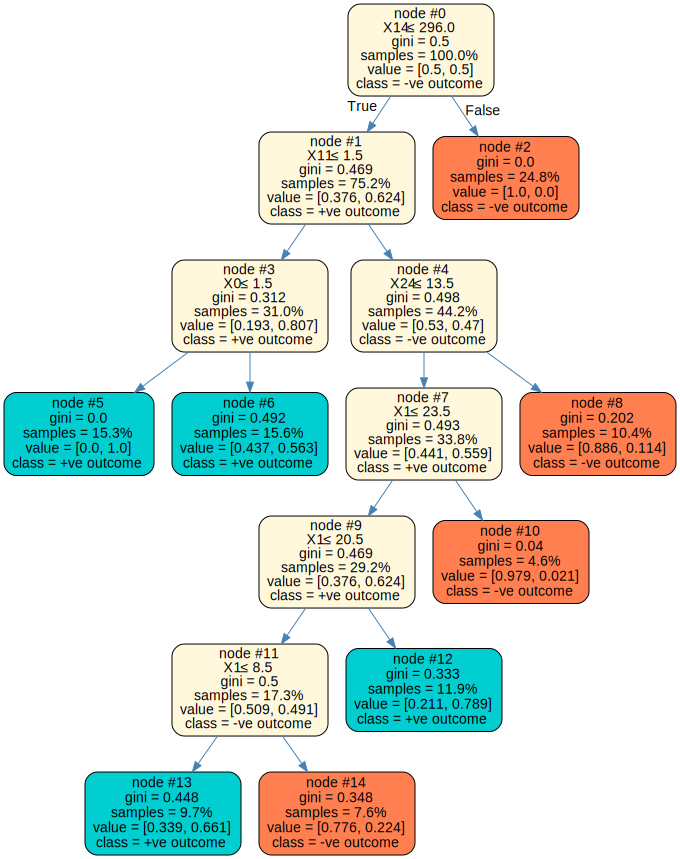

In [35]:
from skater.util.dataops import show_in_notebook
from graphviz import Source
from IPython.display import SVG

graph = Source(surrogate_explainer.plot_global_decisions(colors=['coral', 'darkturquoise'], 
                                          file_name='test_tree_pre.png').to_string())
svg_data = graph.pipe(format='svg')
with open('dtree_structure.svg','wb') as f:
    f.write(svg_data)
SVG(svg_data)

In [36]:
surrogate_predictions = surrogate_explainer.predict(X_test)
class_labels = list(set(labels))
meu.display_model_performance_metrics(true_labels=y_test, predicted_labels=surrogate_predictions, classes=class_labels)

Model Performance metrics:
------------------------------
Accuracy: 0.7604
Precision: 0.7935
Recall: 0.7604
F1 Score: 0.7632

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.89      0.69      0.78     95443
           1       0.64      0.86      0.74     60817

    accuracy                           0.76    156260
   macro avg       0.77      0.78      0.76    156260
weighted avg       0.79      0.76      0.76    156260



# Model Interpretation with SHAP

**SHAP (SHapley Additive exPlanations)** is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations, uniting several previous methods and representing the only possible consistent and locally accurate additive feature attribution method based on what they claim! (do check out the [SHAP NIPS paper](http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions) for details).



### Install

SHAP can be installed from [PyPI](https://pypi.org/project/shap)

```
pip install shap
```

or [conda-forge](https://anaconda.org/conda-forge/shap)

```
conda install -c conda-forge shap 
```

The really awesome aspect about this framework is while SHAP values can explain the output of any machine learning model, for really complex ensemble models it can be slow. But they have developed a high-speed exact algorithm for tree ensemble methods ([Tree SHAP arXiv paper](https://arxiv.org/abs/1802.03888)). Fast C++ implementations are supported for *XGBoost*, *LightGBM*, *CatBoost*, and *scikit-learn* tree models!

* SHAP (SHapley Additive exPlanations) `assigns each feature an importance value for a particular prediction.` Its novel components include: the identification of a new class of additive feature importance measures, and theoretical results showing there is a unique solution in this class with a set of desirable properties. 

* Typically, `SHAP values try to explain the output of a model (function) as a **sum of the effects of each feature** being introduced into a conditional expectation.` Importantly, for non-linear functions the order in which features are introduced matters. The SHAP values result from averaging over all possible orderings. Proofs from game theory show this is the only possible consistent approach. 

* An intuitive way to understand the Shapley value is the following: `The feature values enter a room in random order.` All feature values in the room participate in the `game (= contribute to the prediction).` The Shapley value __$ϕ_{ij}$__ is the average marginal contribution of feature value __$x_{ij}$__ by joining whatever features already entered the room before, i.e.

$$\phi_{ij}=\sum_{\text{All.orderings}}val(\{\text{features.before.j}\}\cup{}x_{ij})-val(\{\text{features.before.j}\})$$

The following figure from the KDD 18 paper, [_Consistent Individualized Feature Attribution for Tree Ensembles_](https://arxiv.org/pdf/1802.03888.pdf) summarizes this in a nice way!

![](https://i.imgur.com/6Rc1dsa.png)

Let's now dive into SHAP and leverage it for interpreting our model!

## Explain predictions with SHAP

Here we use the Tree SHAP implementation integrated into XGBoost to explain the test dataset! Remember that there are a variety of explainer methods based on the type of models you are building. We estimate the SHAP values for a set of samples (test data)

In [37]:
explainer = shap.TreeExplainer(xgc)
shap_values = explainer.shap_values(X_test)

In [38]:
pd.DataFrame(shap_values).head()

0         1         2    3   ...        22        23        24        25
0 -0.238186 -0.564883  0.114891  0.0  ... -0.039772 -0.011862  0.197661 -0.038528
1 -1.502112  0.157706  0.068602  0.0  ... -0.015965  0.036732 -0.147066 -0.003234
2  0.628609  0.058243 -0.145190  0.0  ...  0.038656  0.027551 -0.094216 -0.063908
3  0.489975 -0.776933  0.035897  0.0  ... -0.029206 -0.166802  0.103223 -0.043372
4 -0.154154  0.512610 -0.149996  0.0  ...  0.030324 -0.473385  0.280485  0.001276

[5 rows x 26 columns]

This returns a matrix of SHAP values (`# samples x # features`). Each row sums to the difference between the model output for that sample and the expected value of the model output (which is stored as `expected_value` attribute of the explainer). Typically this difference helps us in explaining why the model is inclined on predicting a specific class outcome.

In [39]:
print('Expected Value:', explainer.expected_value)

Expected Value: -0.550368


In [40]:
shap_values.shape

(156260, 26)

In [41]:
shap_values[0,:].shape

(26,)

In [42]:
X_test_disp.shape

(156260, 26)

In [43]:
X_test_disp.iloc[0,:].shape

(26,)

In [44]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_disp.iloc[0,:])

In [45]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[2,:], X_test_disp.iloc[2,:])

## Visualizing and explaining multiple predictions

One of the key advantages of SHAP is it can build beautiful interactive plots which can visualize and explain multiple predictions at once. Here we visualize model prediction decisions for the first 1000 test data samples.

In [46]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_test_disp.iloc[:1000,:])

## Feature Importances with SHAP

This basically takes the average of the SHAP value magnitudes across the dataset and plots it as a simple bar chart.

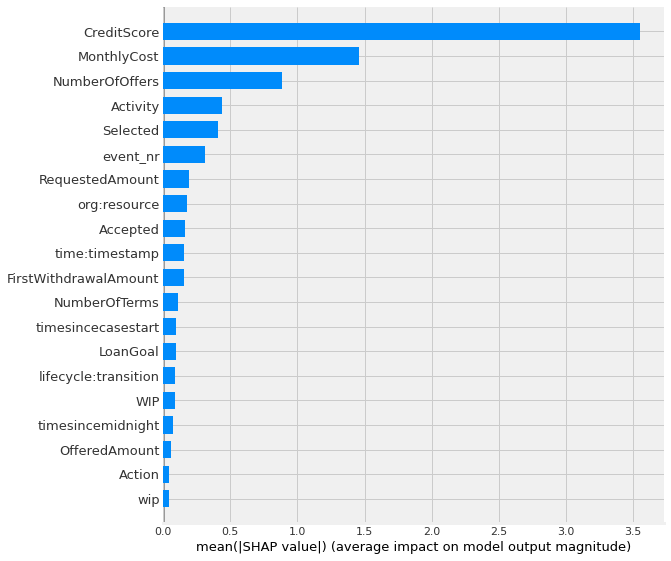

In [47]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

## SHAP Summary Plot

Besides a typical feature importance bar chart, SHAP also enables us to use a `density scatter plot` of SHAP values for each feature `to identify how much impact each feature has on the model output for individuals in the validation dataset.` Features are sorted by the sum of the SHAP value magnitudes across all samples. `It is interesting to note that the age and marital status feature has more total model impact than the captial gain feature, but for those samples where capital gain matters it has more impact than age or marital status.` In other words, **capital gain** effects a few predictions by a **large amount**, while `age or marital status effects all predictions by a smaller amount.`

Note that when the scatter points don't fit on a line they pile up to show density, and the color of each point represents the feature value of that individual.

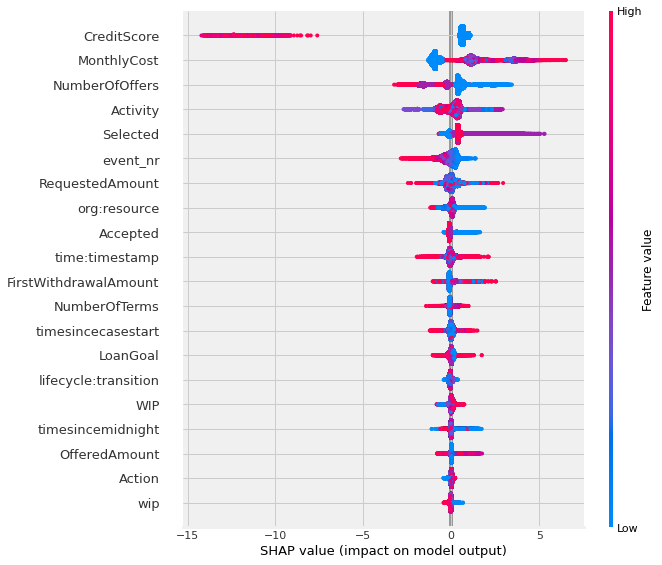

In [48]:
shap.summary_plot(shap_values, X_test)

## SHAP Dependence Plots

* **SHAP dependence plots** `show the effect of a single (or two) feature across the whole dataset.` They plot a `feature's value vs. the SHAP value` of that feature across many samples. SHAP dependence plots are similar to partial dependence plots, but account for the interaction effects present in the features, and are only defined in regions of the input space supported by data. The vertical dispersion of SHAP values at a single feature value is driven by interaction effects, and another feature can be chosen for coloring to highlight possible interactions.



### PDP of 'NumberOfOffers' affecting model prediction


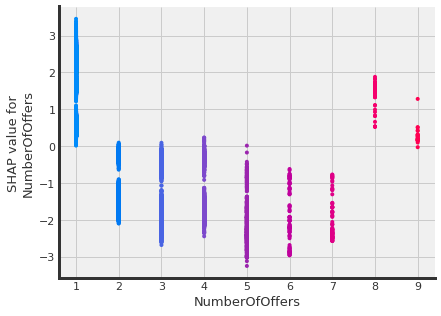

In [49]:
shap.dependence_plot(ind='NumberOfOffers', interaction_index='NumberOfOffers',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test_disp)

### PDP of 'CreditScore' affecting model prediction



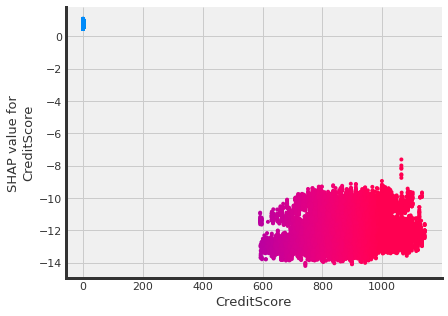

In [50]:
shap.dependence_plot(ind='CreditScore', interaction_index='CreditScore',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test_disp)

### PDP of 'MonthlyCost' affecting model prediction



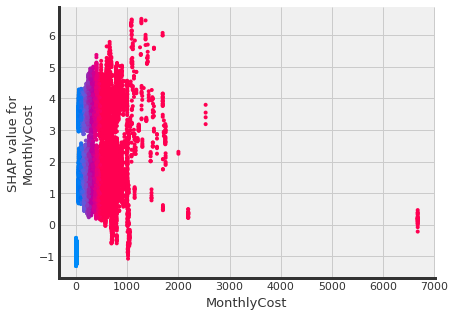

In [51]:
shap.dependence_plot(ind='MonthlyCost', interaction_index='MonthlyCost',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test_disp)

### PDP of 'wip' affecting model prediction



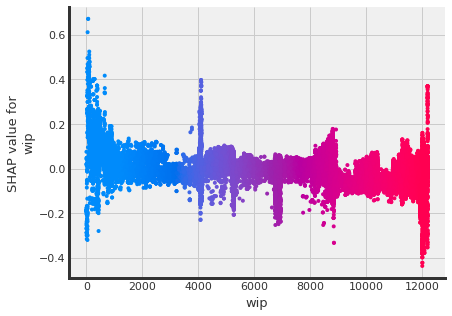

In [52]:
shap.dependence_plot(ind='wip', interaction_index='wip',
                     shap_values=shap_values, 
                     features=X_test,  
                     display_features=X_test_disp)

### Two-way PDP showing interactions between features 'MonthlyCost' and 'NumberOfOffers' and their effect on the outcome. 


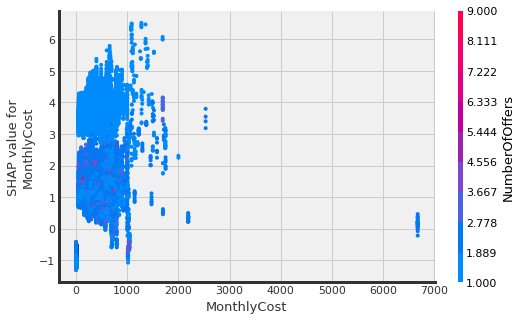

In [53]:
shap.dependence_plot(ind='MonthlyCost', interaction_index='NumberOfOffers', 
                     shap_values=shap_values, features=X_test, 
                     display_features=X_test_disp)

### Two-way PDP showing interactions between features 'NumberOfOffers' and 'wip' and their effect on the final outcome.



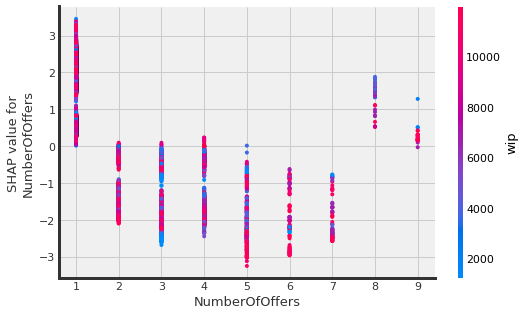

In [54]:
shap.dependence_plot(ind='NumberOfOffers', interaction_index='wip', 
                     shap_values=shap_values, features=X_test, 
                     display_features=X_test_disp)